In [22]:
import os
import random
import time
import uuid
import cv2

In [23]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [16]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH, f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [111]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt
import random

In [25]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [28]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [75]:
images = tf.data.Dataset.list_files('data/images/*.jpg')

In [76]:
images.as_numpy_iterator().next()

b'data\\images\\f550d1c4-7172-11ed-b710-f434f0e25b32.jpg'

In [77]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [78]:
images = images.map(load_image)

In [79]:
images.as_numpy_iterator().next()

array([[[ 88,  98, 100],
        [ 86,  96,  98],
        [ 86,  96,  98],
        ...,
        [157, 160, 153],
        [155, 157, 152],
        [152, 154, 149]],

       [[ 88,  98, 100],
        [ 87,  97,  99],
        [ 87,  97,  99],
        ...,
        [156, 159, 152],
        [154, 156, 151],
        [152, 154, 149]],

       [[ 88,  98,  99],
        [ 88,  98,  99],
        [ 89,  99, 100],
        ...,
        [154, 157, 150],
        [152, 155, 148],
        [151, 154, 147]],

       ...,

       [[ 73,  79,  77],
        [ 73,  79,  77],
        [ 71,  80,  77],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 74,  80,  78],
        [ 73,  79,  77],
        [ 71,  80,  77],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[ 74,  80,  78],
        [ 73,  79,  77],
        [ 71,  80,  77],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]]

In [80]:
type(images), len(images)

(tensorflow.python.data.ops.dataset_ops.MapDataset, 35)

In [81]:
image_generator = images.batch(5).as_numpy_iterator()

In [82]:
plot_images = image_generator.next()

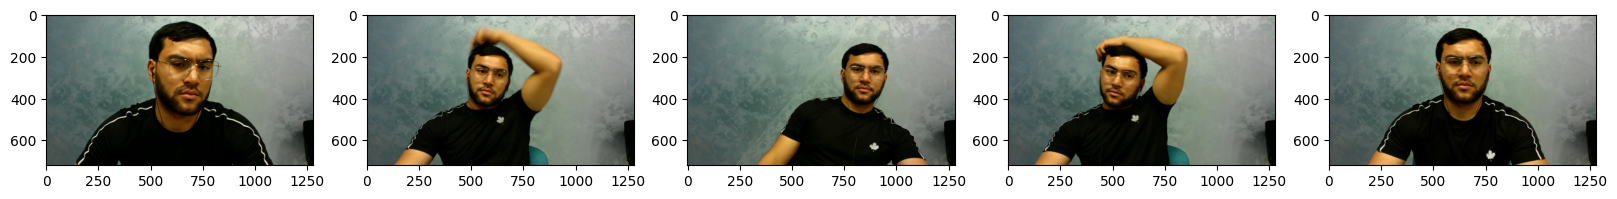

In [83]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, image in enumerate(plot_images):
    # im = str(image)[2:-1]
    # image = plt.imread(im)
    ax[idx].imshow(image)
plt.show()

In [158]:
images_dir = os.listdir(os.path.join('data', 'images'))
images_dir

['e5c36da2-7172-11ed-b710-f434f0e25b32.jpg',
 'e627993a-7172-11ed-b710-f434f0e25b32.jpg',
 'e6826536-7172-11ed-b710-f434f0e25b32.jpg',
 'e6d8cb24-7172-11ed-b710-f434f0e25b32.jpg',
 'e732618e-7172-11ed-b710-f434f0e25b32.jpg',
 'efcee11e-7172-11ed-b710-f434f0e25b32.jpg',
 'f0243b14-7172-11ed-b710-f434f0e25b32.jpg',
 'f07f25ce-7172-11ed-b710-f434f0e25b32.jpg',
 'f0d68404-7172-11ed-b710-f434f0e25b32.jpg',
 'f12f3e0a-7172-11ed-b710-f434f0e25b32.jpg',
 'f18b3098-7172-11ed-b710-f434f0e25b32.jpg',
 'f1df270c-7172-11ed-b710-f434f0e25b32.jpg',
 'f235943e-7172-11ed-b710-f434f0e25b32.jpg',
 'f28f70e4-7172-11ed-b710-f434f0e25b32.jpg',
 'f2e51576-7172-11ed-b710-f434f0e25b32.jpg',
 'f33f8b1e-7172-11ed-b710-f434f0e25b32.jpg',
 'f39a4c70-7172-11ed-b710-f434f0e25b32.jpg',
 'f3efe2c0-7172-11ed-b710-f434f0e25b32.jpg',
 'f44ad892-7172-11ed-b710-f434f0e25b32.jpg',
 'f4a036f2-7172-11ed-b710-f434f0e25b32.jpg',
 'f4faa650-7172-11ed-b710-f434f0e25b32.jpg',
 'f550d1c4-7172-11ed-b710-f434f0e25b32.jpg',
 'f5ab44ba

In [159]:
list_data_trin = []
for _ in range(22):
    fil_random = random.choice(images_dir)
    list_data_trin.append(fil_random)
    images_dir.remove(fil_random)

In [161]:
for file in list_data_trin:
    existing_filepath = os.path.join('data', 'images', file)
    new_filepath = os.path.join('data', 'train', 'images', file)
    os.replace(existing_filepath, new_filepath)

In [169]:
images_dir = os.listdir(os.path.join('data', 'images'))
images_dir

['e6d8cb24-7172-11ed-b710-f434f0e25b32.jpg',
 'e732618e-7172-11ed-b710-f434f0e25b32.jpg',
 'f12f3e0a-7172-11ed-b710-f434f0e25b32.jpg',
 'f18b3098-7172-11ed-b710-f434f0e25b32.jpg',
 'f44ad892-7172-11ed-b710-f434f0e25b32.jpg',
 'f550d1c4-7172-11ed-b710-f434f0e25b32.jpg',
 'f6009226-7172-11ed-b710-f434f0e25b32.jpg',
 'f6b158fe-7172-11ed-b710-f434f0e25b32.jpg',
 'f7bc90a6-7172-11ed-b710-f434f0e25b32.jpg',
 'f8121526-7172-11ed-b710-f434f0e25b32.jpg',
 'f86ca036-7172-11ed-b710-f434f0e25b32.jpg',
 'f97754ee-7172-11ed-b710-f434f0e25b32.jpg',
 'f9cccb0e-7172-11ed-b710-f434f0e25b32.jpg']

In [170]:
list_data_test = []
for _ in range(7):
    fil_random = random.choice(images_dir)
    list_data_test.append(fil_random)
    images_dir.remove(fil_random)

In [171]:
for file in list_data_test:
    existing_filepath = os.path.join('data', 'images', file)
    new_filepath = os.path.join('data', 'test', 'images', file)
    os.replace(existing_filepath, new_filepath)

In [172]:
images_dir = os.listdir(os.path.join('data', 'images'))
images_dir

['f18b3098-7172-11ed-b710-f434f0e25b32.jpg',
 'f44ad892-7172-11ed-b710-f434f0e25b32.jpg',
 'f550d1c4-7172-11ed-b710-f434f0e25b32.jpg',
 'f6009226-7172-11ed-b710-f434f0e25b32.jpg',
 'f6b158fe-7172-11ed-b710-f434f0e25b32.jpg',
 'f9cccb0e-7172-11ed-b710-f434f0e25b32.jpg']

In [173]:
for file in images_dir:
    existing_filepath = os.path.join('data', 'images', file)
    new_filepath = os.path.join('data', 'val', 'images', file)
    os.replace(existing_filepath, new_filepath)

In [175]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)